***LINEAR MODELS***

**EXERCISE 1**

We consider a system with the output described by the following function: y(t) = sin(2πt), where t denotes time limited to the following interval t ∈ [0 : 1]. We perform a measurement of the system’s output at distinct times $t_k$. The record signal, corrupted by the measurement noise, $n_k$, is now expressed as:

$y_k = sin(2 \pi t_k) + n_k,
where
 k = 1..L$

where $t_k$ is drawn from the uniform distribution in the range from 0 to 1, i.e. $t_k$ ∼ UI[0;1] and nk is the measurement noise, drawn from the Gaussian distribution with zero mean and variance σ2, i.e. $n_k ∼ \N (0, σ2)$.

    1. Ploty(t) by assuming that t=0:0.01:1.
    2. Generate and plot yk (when plotting do not connect the dots). Assume that L = 100 and σ2 = 0.09. Comment on the graph!
    3. Observe the impact of increasing the measurement noise variance from σ2 = 0 to σ2 = 0.09 on yk.


    1. Ploty(t) by assuming that t=0:0.01:1.

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [372]:
L=101
tn = np.linspace(0,1,L) #Start, Finish, Number of points.

In [373]:
yn=np.sin(2*np.pi*tn)

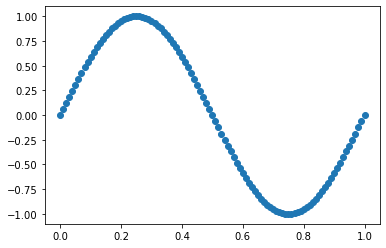

In [374]:
fig1 = plt.figure(1)
plt.scatter(tn,yn,alpha=1)

    2. Generate and plot yk (when plotting do not connect the dots). Assume that L = 100 and σ2 = 0.09. Comment on the graph!

In [375]:
noise=np.random.normal(0,0.09,101)
yn2 = np.sin(2*np.pi*tn)+noise

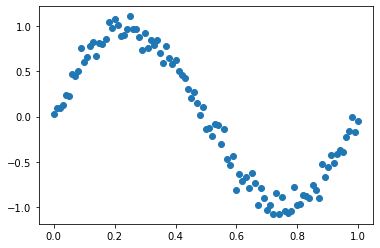

In [376]:
fig2 = plt.figure(2)
plt.scatter(tn,yn2,alpha=1)

    3. Observe the impact of increasing the measurement noise variance from σ2 = 0 to σ2 = 0.09 on yk.

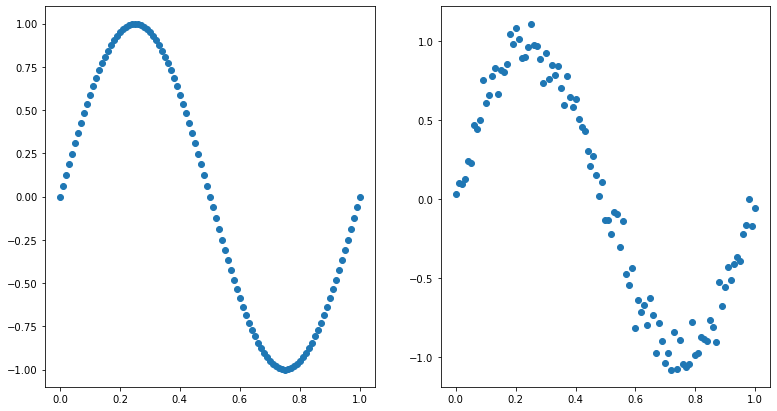

In [377]:
fig3 = plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.scatter(tn,yn,alpha=1)
plt.subplot(1,2,2)
plt.scatter(tn,yn2,alpha=1)


When noise term is added, one can observe how the output of the function remains approximately the same but there is a noticeable variation underlying the function which maps the output based on the input.

**LINEAR MODEL REGRESSION**

Now, we are going to assume that we do not know the analytical expression for $y(t)$ and the objective is to learn it from the recorded data–set. The training data–set consist of the training input $X = [t_1, t_2, ..., t_L]^T$ and the output $Y = [y_1, y_2, ..., y_L]^T$ , data, where T denotes the transpose. The data–set is denoted $D^{L×2}$ = [X, Y]. Since we do not know the exact analytical expression for the function, y(t), we will assume the following model (polynomial):

$y\hat(x_k,\bold{W})=w_0 +w_1t_k +w_2t2_k +...+w^Mt^M_k=\sum_{j=0}^M w_jt^j_k$

where M and $\bold W = [w_0,w_1,...w_M]$ are the unknown polynomial order and the weight vector, respectively.

1. Use the lecture slides and implement a gradient descent based iterative algorithm for determining the weights $\bold{W} = [w_0, w_1, ...w_M]$. Assume L = 100, σ2 = 0.09, M = 3, η = 0.1. Use 3000 iterations for the gradient descent.
2. Plot the mean square error between the learned model, $y^ (x_k,W)$ and the training data $Y = [y_1, y_2, ..., y_L]^T$ as a function of the number of iterations. What can be concluded by observing the evolution of the mean square error?
3. Evaluate the learned model, $yˆ(x_k,W)$, by testing it for t = 0 : 0.01 : 1. Plot $yˆ(x_k,W)$ together with $y(t) = sin(2πt)$. Comment on the results!

    1. Use the lecture slides and implement a gradient descent based iterative algorithm for determining the weights $\bold{W} = [w_0, w_1, ...w_M]$. Assume L = 100, σ2 = 0.09, M = 3, η = 0.1. Use 3000 iterations for the gradient descent.

**The Gradient Descent Algorithm**

Iterative optimization algorithm to find the minimum of the Loss Function.
In the regression case, the Loss Fucntion is the sum-of-sqaures.


$E = \frac{1}{n} \sum_{i=0}^n(y_n-\hat{y_n})$

Where $y_n$ is the real  value in this case illustrated by the real value of the $sin(2\pi t)$ function and $\hat{y_n}$ is the predicted output of the linear model.

The learning rate $n$ will determine how much the value of the weights change after each iteration.

The gradient descent technique implies to compute the direction in which the Loss Function changes at a faster rate in order to modify the weights of the model in the contrary direction.

In this case the linear model is designed to have 3 parameters. M=3. Hence the polynomial shape of the model is as follows:

$\hat{y_n(x_n)} = w_0 + \sum_{i=0}^M(w_i x_i)$

And the degrees of freedom of the system are the weights of the model. Which are what we are trying to optimize based on the gradient descent algorithm based on the minimization of the Error Function.

In [378]:
it = 3000   # Iterations of the weight optimization algo.
L = 100     # Number of samples in the pattern dataset
sigma = 0.09  # Noise Variance Indicator
M = 3       # Order of the polynomial
n = 0.1     # Learning rate

In [379]:
tn = np.linspace(0.01,1,L)[np.newaxis]                # Model input
yn = np.sin(2*np.pi*tn) + np.random.normal(0,sigma,L) # Real output

In [380]:
W_init =np.ones(M+1)  # Initialization of the model weights
bias = np.ones([L,1],dtype=float)
tn.T
tn2 = (tn.T**2)
tn3 = (tn.T**3)
X = np.concatenate([bias, tn.T, tn2, tn3],axis=1) #The feed of the model will be in fact:

In [381]:
W = W_init
for i in range(0,it):
    for j in range(0,L):
        # To update the weight values, we need to compute the gradient of the error respect the weights. Direction in which higher changes
        y_hat = np.sum(np.matmul(W.T,X[j]))
        grad = -((yn.T[j]-y_hat)*X[j])
        W=W-n*grad


In [382]:
W

array([  0.10627933,   8.5209967 , -26.45713719,  17.85723028])

    2. Plot the mean square error between the learned model, $y^(x_k,W)$ and the training data $Y = [y_1, y_2, ..., y_L]^T$ as a function of the number of iterations. What can be concluded by observing the evolution of the mean square error?

In [383]:
W = W_init
Error = np.zeros(it)
for i in range(0,it):
    for j in range(0,L):
        # To update the weight values, we need to compute the gradient of the error respect the weights. Direction in which higher changes
        y_hat = np.sum(np.matmul(W.T,X[j]))
        grad = -(yn.T[j]-y_hat)*X[j]
        W=W-n*grad
        Error_int = 0.5*(yn.T[j]-y_hat)**2
    Error_av = (np.sum(Error_int))/L
    Error[i] = Error_av

Text(0.5, 1.0, 'Error vs iterations in weight update')

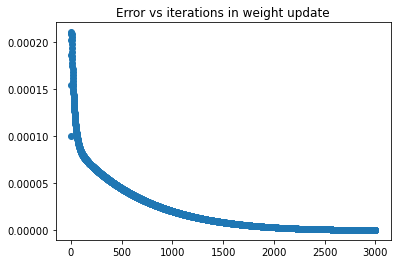

In [384]:
plt.scatter(range(0,it),Error,alpha=1)
plt.title("Error vs iterations in weight update")

$\color{red}{\text{As can be seen in the plot, the error tends to increase after the 500 iterations and tends to decrease its incremenation rate around the 3000 iteration. Still the variation is between [0.1e-5, 6e-5]}}$


    3. Evaluate the learned model, yˆ(xk,W), by testing it for t = 0 : 0.01 : 1. Plot yˆ(xk,W) together with y(t) = sin(2πt). Comment on the results!   

In [385]:
print("Weights of the model are: W0=%0.2f,  W1=%0.2f,  W2=%0.2f,  W3=%0.2f" %(W[0], W[1], W[2], W[3]))

Weights of the model are: W0=0.11,  W1=8.52,  W2=-26.46,  W3=17.86


In [386]:
y_pred = np.zeros([L,1])
x_test = np.linspace(0.01, 1, L)[np.newaxis]
input = np.stack((np.ones([1,L]).T, x_test.T, (x_test**2).T, (x_test**3).T), axis=-1)
prod = np.reshape((W*input),(100,4))
for j in range(0,L):
    y_pred[j] = sum(prod[j])


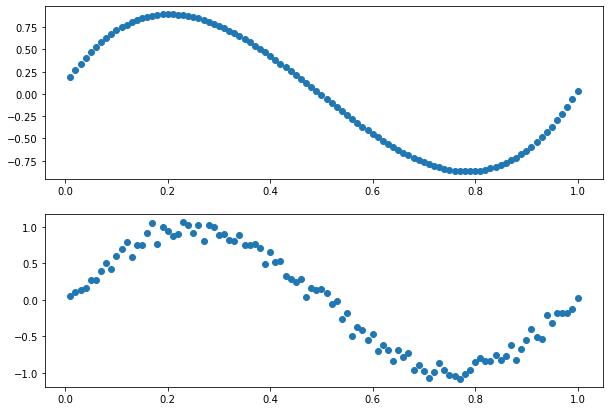

In [387]:
fig, axs = plt.subplots(2,figsize=(10,7))
axs[0].scatter(tn, y_pred)
axs[1].scatter(tn, yn)

    4. Repeat task 3 by varying the length of L from 10 to 100 in steps of 10. Adjust η and the number of iterations to obtain the best fit. Assume σ2 = 0.09 and M = 3. What is the impact of decreasing the training data set L?

Since we already worked with a data set created based on the length L=100. We will create a new model which will begin learning based on data of size L=10 and we will see how it shows that the error developes.

In [388]:
LL = np.linspace(10,100,10, endpoint=True)
L = np.zeros(10)
for i,idx in zip(LL,range(0,len(LL))):
    L[idx] = int(i)
n = 0.3
it = 2000
M = 3
var = 0.09

In [389]:
for i in L:
    i = int(i)
    print("Dataset size %i" %i)
    tn = np.linspace(0.01,1,i)[np.newaxis]
    bias = np.ones((int(i),1))
    xn = np.stack((bias, tn.T, (tn**2).T, (tn**3).T), axis=-1)
    yn = np.sin(2*np.pi*tn)+np.random.normal(0,var,i)
    W_init = np.ones((1,M+1))
    W = W_init
    E_final = 0
    for j in range(0,it):
        E_it = 0
        for l in range(0,i):
            grad = -(yn.T[l]-np.sum(W*xn[l]))*xn[l]
            W = W-n*grad
            E_obs = yn.T[l]-np.sum(W*xn[l])
            E_it += E_obs
    print("Error for %i iterations is %.5f" %(j, E_it))

Dataset size 10
Error for 1999 iterations is -0.04721
Dataset size 20
Error for 1999 iterations is -0.02477
Dataset size 30
Error for 1999 iterations is -0.02016
Dataset size 40
Error for 1999 iterations is -0.01114
Dataset size 50
Error for 1999 iterations is -0.01352
Dataset size 60
Error for 1999 iterations is -0.00495
Dataset size 70
Error for 1999 iterations is -0.01824
Dataset size 80
Error for 1999 iterations is 0.00030
Dataset size 90
Error for 1999 iterations is -0.02093
Dataset size 100
Error for 1999 iterations is -0.00254


Instead of using the gradient descent to determine the weights W, it is more convenient to use Moore-Penrose Pseudo–Inverse (MPPI). The weight vector W can then be obtained in a single step without the need to adjust the step–size η.

1. Use the lecture slides and implement the MPPI method for determining the weights W = [w0,w1,...wM]. Assume L = 100, σ2 = 0.09, M = 3.
2. Evaluate the learned model, yˆ(tk,w), by testing it for t = 0 : 0.01 : 1 and plotting it against y(t) = sin(2πt). Compare the results with the ones obtained using the gradient descent.
3. Increase the length of the data–set L to 1000. Employ 10–fold cross-validation for learning and testing the model. This implies that you use 900 points for training and 100 for testing. By shuffling the test–set through the data–set you will obtain 10 test–sets and therefore you will obtain 10 different values for the weight vector W. (Please consult the slides on how to perform cross–validation.
4. Evaluate and plot the root mean square error on the training and test–sets for each of the folds. The root mean square error is defined as:

    1. Use the lecture slides and implement the MPPI method for determining the weights W = [w0,w1,...wM]. Assume L = 100, σ2 = 0.09, M = 3.

In [390]:
L = 100
it = 2000
M = 3
var = 0.09

In [391]:
bias = np.ones((L,1))
tn = np.linspace(0.01,1,L)[np.newaxis]
xn = np.stack((bias, tn.T, (tn**2).T, (tn**3).T),axis=-1)
xn = xn.reshape(L,4)
yn = np.sin(2*np.pi*tn)+np.random.normal(0,var,L)
yn = np.reshape(yn, 100)

Pseudo Inverse method:

$W = (\Phi^T\Phi)^{-1}\Phi^{T}Y$

In [392]:
term1 = np.dot(xn.T,xn)
print(term1.shape)
term2 = np.dot(np.linalg.inv(term1),xn.T)
print(term2.shape)
W = np.dot(term2,yn)


(4, 4)
(4, 100)


    2. Evaluate the learned model, yˆ(tk,w), by testing it for t = 0 : 0.01 : 1 and plotting it against y(t) = sin(2πt). Compare the results with the ones obtained using the gradient descent.

In [393]:
y_pred = np.zeros([L,1])
x_test = np.linspace(0.01, 1, L)[np.newaxis]
input = np.stack((np.ones([1,L]).T, x_test.T, (x_test**2).T, (x_test**3).T), axis=-1)
input = input.reshape(100,4)
prod = W.T*input
for j in range(0,L):
    y_pred[j] = sum(prod[j])

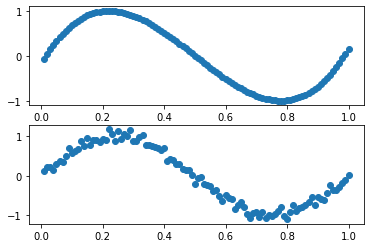

In [394]:
fig, axs = plt.subplots(2)
axs[0].scatter(tn,y_pred)
axs[1].scatter(tn,yn)

    3. Increase the length of the data–set L to 1000. Employ 10–fold cross-validation for learning and testing the model. This implies that you use 900 points for training and 100 for testing. By shuffling the test–set through the data–set you will obtain 10 test–sets and therefore you will obtain 10 different values for the weight vector W. (Please consult the slides on how to perform cross–validation.

In [395]:
L = 1000
it = 2000
M = 3
var = 0.09

In [396]:
bias = np.ones((L,1))
tn = np.linspace(0.01,1,L)[np.newaxis]
xn = np.stack((bias, tn.T, (tn**2).T, (tn**3).T),axis=-1)
yn = np.sin(2*np.pi*tn)+np.random.normal(0,var,L)
yn = np.reshape(yn, 1000)

In [397]:
#CROSS VALIDATION
folds = 10 #No. of folds
batch_size = L/folds
batches_X = np.zeros((int(batch_size),M+1,folds))
batches_Y = np.zeros((int(batch_size),folds))
for i in range(0,folds):
    batches_X[:,:,i] = xn[int(batch_size)*i:int(batch_size)*(i+1)].reshape(100,4)
    batches_Y[:,i] = yn[int(batch_size)*i:int(batch_size)*(i+1)]

In [398]:
X_train = np.zeros((900,4))
Y_train = np.zeros(900)
count = 0 #Counter for keeping track of the number of folds stored in the training set
for i in range(0,folds):
    for j in range(0,folds):
        if j == i:
            X_test = batches_X[:,:,j]
            y_test = batches_Y[:,j]
            #print("Stored the test set")
        else:
            #print("Count is %i" %count)
            low_lim = 100*count
            upp_lim = 100*(count+1)
            X_train[low_lim:upp_lim] = batches_X[:,:,j]
            Y_train[low_lim:upp_lim] = batches_Y[:,j]
            count += 1
            #Once the bactches are completed we have to train the model with the given data in order to find the optimal weights. Moore-Penrose-Pseudo-Inverse (MPPI) Method
    #print("Finished storing the batches")
    count = 0 
    term1 = np.dot(X_train.T, X_train)
    print(term1.shape)
    term2 = np.dot(np.linalg.inv(term1),X_train.T)
    print(term2.shape)
    W = np.dot(term2,Y_train)
    print("For iteration %i, the optimal weights are [%.2f, %.2f, %.2f, %.2f]" %(i, W[0], W[1], W[2], W[3]))
    Error = 0
    for i in range(0,len(y_test)):
        e = 0.5*(y_test[i]-np.sum(W*x_test[:,i]))**2
        Error += e
    Error = Error/len(y_test)
    print("It's generalization error is %.2f" %Error)




(4, 4)
(4, 900)
For iteration 0, the optimal weights are [-0.40, 13.38, -37.47, 24.73]
It's generalization error is 0.04
(4, 4)
(4, 900)
For iteration 1, the optimal weights are [-0.20, 12.19, -35.37, 23.61]
It's generalization error is 0.27
(4, 4)
(4, 900)
For iteration 2, the optimal weights are [-0.22, 12.16, -35.12, 23.40]
It's generalization error is 0.38
(4, 4)
(4, 900)
For iteration 3, the optimal weights are [-0.20, 11.76, -34.26, 22.90]
It's generalization error is 0.24
(4, 4)
(4, 900)
For iteration 4, the optimal weights are [-0.22, 12.08, -34.99, 23.35]
It's generalization error is 0.04
(4, 4)
(4, 900)
For iteration 5, the optimal weights are [-0.23, 12.18, -35.10, 23.35]
It's generalization error is 0.12
(4, 4)
(4, 900)
For iteration 6, the optimal weights are [-0.22, 11.97, -34.42, 22.85]
It's generalization error is 0.43
(4, 4)
(4, 900)
For iteration 7, the optimal weights are [-0.22, 12.15, -35.06, 23.35]
It's generalization error is 0.61
(4, 4)
(4, 900)
For iteration 8,

$\color{red}{\text{The issue with this approach is that the Moore-Penrose-Pseudo-Inverse MPPI is not using the folds}}$
$\color{green}{\text{WE WILL THEREFORE USE THE GRADIENT DESCENT METHOD TO DETERMINE THE WEIGHTS OF THE MODEL}}$


In [399]:
X_train = np.zeros((900,4))
Y_train = np.zeros(900)
iterations = 2500
n = 0.09 #LEARNING RATE
count = 0 #Counter for keeping track of the number of folds stored in the training set
Error_erms_te = np.zeros((1,folds))
Error_erms_tr = np.zeros((1,folds))
for i in range(0,folds):
    print("Iteration %i" %(i+1))
    W = np.ones((M+1)) 
    for j in range(0,folds):
        if j == i:
            X_test = batches_X[:,:,j]
            Y_test = batches_Y[:,j]
            #print("Stored the test set")
        else:
            #print("Count is %i" %count)
            low_lim = 100*count
            upp_lim = 100*(count+1)
            X_train[low_lim:upp_lim] = batches_X[:,:,j]
            Y_train[low_lim:upp_lim] = batches_Y[:,j]
            count += 1
            #Once the bactches are completed we have to train the model with the given data in order to find the optimal weights. Moore-Penrose-Pseudo-Inverse (MPPI) Method
    print("Finished storing the batches")
    count = 0
    #
    #   TRAINING 
    #
    #Training the model based in the Gradient Descent Technique
    for it in range(0,iterations):
        for k in range(0,len(Y_train)):
            y_hat = np.matmul(W.T,X_train[k])
            grad = -(Y_train[i]-y_hat)*X_train[k]
            W = W-n*grad
    print("For iteration %i, the optimal weights are [%.4f, %.4f, %.4f, %.4f]" %(i, W[0], W[1], W[2], W[3]))
    #
    #   EVALUATING
    #   
    #       1. TEST SET
    #
    erms_te = 0
    for k in range(0,len(Y_test)):
        y_hat = np.matmul(W.T,X_test[k])
        partial_error = (Y_test[k]-y_hat)**2
        erms_te += partial_error
    Error_erms_te[:,i] = math.sqrt(erms_te/len(Y_test))
    print("It's generalization error is %.2f" %Error_erms_te[:,i])
    #   
    #       2. TRAIN SET
    #
    erms_tr = 0
    for k in range(0,len(Y_train)):
        y_hat = np.matmul(W.T,X_train[k])
        partial_error = (Y_train[k]-y_hat)**2
        erms_tr += partial_error
    Error_erms_tr[:,i] = math.sqrt(erms_tr/len(Y_train))
    print("It's train error is %.2f" %Error_erms_tr[:,i])
    

Iteration 1
Finished storing the batches
For iteration 0, the optimal weights are [0.5701, 0.0121, -0.0219, 0.0116]
It's generalization error is 0.28
It's train error is 0.96
Iteration 2
Finished storing the batches
For iteration 1, the optimal weights are [0.2287, 0.0041, -0.0085, 0.0048]
It's generalization error is 0.62
It's train error is 0.77
Iteration 3
Finished storing the batches
For iteration 2, the optimal weights are [-0.0826, 0.0042, -0.0086, 0.0049]
It's generalization error is 1.06
It's train error is 0.67
Iteration 4
Finished storing the batches
For iteration 3, the optimal weights are [-0.0647, 0.0039, -0.0080, 0.0045]
It's generalization error is 0.85
It's train error is 0.70
Iteration 5
Finished storing the batches
For iteration 4, the optimal weights are [0.1684, 0.0038, -0.0078, 0.0044]
It's generalization error is 0.22
It's train error is 0.77
Iteration 6
Finished storing the batches
For iteration 5, the optimal weights are [0.0863, 0.0039, -0.0081, 0.0046]
It's ge

    4. Evaluate and plot the root mean square error on the training and test–sets for each of the folds. The root mean square error is defined as:

$E_{RMS} = \sqrt{(\frac{1}{L_{train/test}}\sum_{k=0}^{L_{train/test}}[y{k,train/test}-\hat{y}(x_{k,train/test},\bold{W})]^2)/L_{train/test}}$

where $L_{k, train/test}$ is the length of the training and test-set, respectiveliy. And $x_{train/test}$ and $y_{train/test}$ are the input/output values belonging to the training-set and test-set respectively

$\color{red}{\text{If the error function changes, shouldn't it change because the gradient descent is related to the surface error and therefore the formula to update the weights?}}$


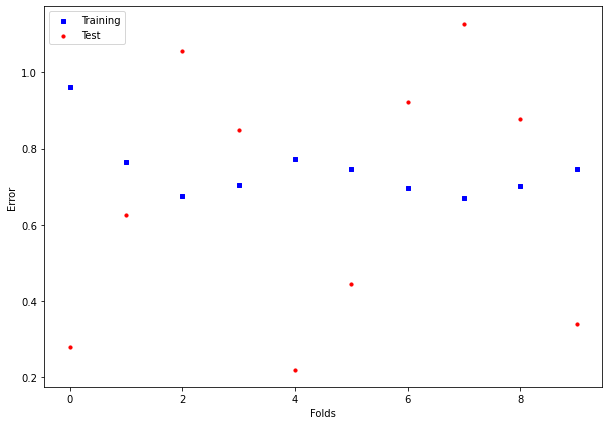

In [400]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.scatter(range(0,folds), Error_erms_tr[:,:], s=10, c='b', marker="s", label='Training')
ax1.scatter(range(0,folds),Error_erms_te[:,:], s=10, c='r', marker="o", label='Test')
ax1.set_xlabel("Folds")
ax1.set_ylabel("Error")
plt.legend(loc='upper left')
plt.show()


**EXERCISE 2**

The goal of the following exercise is to implement Rosenblatt perceptron and use it for learning logical gates functions.
1. Implement AND,OR and XOR table.
2. Generate a training and test–set by performing uniform sampling from AND table. Set the length of the training and test–set to 2000, respectively. HINT: to perform uniform sampling first generate a vector X = randi(4,1,L), where L is the length of the vector.
3. Use the slides (book) and implement a Rosenblatt perceptron. Plot the mean square error computed on the training and the test–set. Use η = 10−6. Comment on the results!
4. Repeat item 2–3 for OR and XOR gate. Can you learn OR and XOR gate? Comment on the results

    1. Implement AND,OR and XOR table.

| | AND | |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

.
| | OR | |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

.

| | XOR | |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | $\bold{0}$ |

    2. Generate a training and test–set by performing uniform sampling from AND table. Set the length of the training and test–set to 2000, respectively. HINT: to perform uniform sampling first generate a vector X = randi(4,1,L), where L is the length of the vector.

In [401]:
#
# Training Set
# 
L = 2000
X1 = np.random.randint(0,2,L)
X2 = np.random.randint(0,2,L)
y_train = np.zeros((L))
x_train = np.stack([X1,X2], axis=1)
for i in range(0,L):
    if x_train[i,0] == x_train[i,1]:
        y_train[i] = 1
    #print("X_train=[%i, %i], y_train=%i" %(X_train[i,0], X_train[i,1], y_train[i]))
#
# Test Set
# 
X1_test = np.random.randint(0,2,L)
X2_test = np.random.randint(0,2,L)
y_test = np.zeros((L))
x_test = np.stack([X1_test,X2_test], axis=1)
for i in range(0,L):
    if x_test[i,0] == x_test[i,1]:
        y_test[i] = 1


    3. Use the slides (book) and implement a Rosenblatt perceptron. Plot the mean square error computed on the training and the test–set. Use η = 10−6. Comment on the results!

Perceptron Algorithm, is the most basic single-layered neural network used for binary classification. First, we will look at the Unit Step Function and see how the Perceptron Algorithm classifies and then have a look at the perceptron update rule.


![title](https://miro.medium.com/max/1400/1*ofVdu6L3BDbHyt1Ro8w07Q.png)


The neuron takes an extra constant input associated with a synaptic weight b (denoted Θ in the figure above), also known as the bias. Concerning the MCP neuron, the bias b is simply the negative of the activation threshold.

- The synaptic weights wₖ are not restricted to unity, thus allowing some inputs to have more influence on the neuron’s output than others.

- They are not restricted to be strictly positive either. Some of the inputs can hence have an inhibitory influence.
    
- The absolute inhibition rule no longer applies.


![title](https://miro.medium.com/max/1400/1*wje5-soLhLjDApnuPMwm2A.png)

In [402]:
n = 1e-6 # Learning rate
bias = np.ones((L))
x_train_final = np.stack((bias,x_train[:,0],x_train[:,1]),axis=-1)
weights = np.ones((len(x_train[1])+1)) # Random initialization of the adapatative parameters 
W = weights #(bias + w1 + w2)
X = x_train_final
output = 0
for i in range(0,len(y_train)):
    output = np.matmul(W,X[i])
    if output >= 0:
        y_hat = 1
    else:
        y_hat = -1
    if y_train[i] == 1:
        d = 1
    else:
        d = -1
    W = W - n*(d-y_hat)*X[i]

In [403]:
W

array([1.001998, 1.000976, 1.001022])

    5. Plot the training error and test root mean square error as a function of the polynomial order M ranging from 1 to 11. How do we find the right polynomial model order?


In [404]:
X_train = np.zeros((900,4))
Y_train = np.zeros(900)
iterations = 2500
n = 0.09 #LEARNING RATE
count = 0 #Counter for keeping track of the number of folds stored in the training set
Error_erms_te = np.zeros((1,folds))
Error_erms_tr = np.zeros((1,folds))
for i in range(0,folds):
    print("Iteration %i" %(i+1))
    W = np.ones((M+1)) 
    for j in range(0,folds):
        if j == i:
            X_test = batches_X[:,:,j]
            Y_test = batches_Y[:,j]
            #print("Stored the test set")
        else:
            #print("Count is %i" %count)
            low_lim = 100*count
            upp_lim = 100*(count+1)
            X_train[low_lim:upp_lim] = batches_X[:,:,j]
            Y_train[low_lim:upp_lim] = batches_Y[:,j]
            count += 1
            #Once the bactches are completed we have to train the model with the given data in order to find the optimal weights. Moore-Penrose-Pseudo-Inverse (MPPI) Method
    print("Finished storing the batches")
    count = 0
    #
    #   TRAINING 
    #
    #Training the model based in the Gradient Descent Technique
    for it in range(0,iterations):
        for k in range(0,len(Y_train)):
            y_hat = np.matmul(W.T,X_train[k])
            grad = -(Y_train[i]-y_hat)*X_train[k]
            W = W-n*grad
    print("For iteration %i, the optimal weights are [%.4f, %.4f, %.4f, %.4f]" %(i, W[0], W[1], W[2], W[3]))
    #
    #   EVALUATING
    #   
    #       1. TEST SET
    #
    erms_te = 0
    for k in range(0,len(Y_test)):
        y_hat = np.matmul(W.T,X_test[k])
        partial_error = (Y_test[k]-y_hat)**2
        erms_te += partial_error
    Error_erms_te[:,i] = math.sqrt(erms_te/len(Y_test))
    print("It's generalization error is %.2f" %Error_erms_te[:,i])
    #   
    #       2. TRAIN SET
    #
    erms_tr = 0
    for k in range(0,len(Y_train)):
        y_hat = np.matmul(W.T,X_train[k])
        partial_error = (Y_train[k]-y_hat)**2
        erms_tr += partial_error
    Error_erms_tr[:,i] = math.sqrt(erms_tr/len(Y_train))
    print("It's train error is %.2f" %Error_erms_tr[:,i])
    

Iteration 1
Finished storing the batches
For iteration 0, the optimal weights are [0.5701, 0.0121, -0.0219, 0.0116]
It's generalization error is 0.28
It's train error is 0.96
Iteration 2
Finished storing the batches
For iteration 1, the optimal weights are [0.2287, 0.0041, -0.0085, 0.0048]
It's generalization error is 0.62
It's train error is 0.77
Iteration 3
Finished storing the batches
For iteration 2, the optimal weights are [-0.0826, 0.0042, -0.0086, 0.0049]
It's generalization error is 1.06
It's train error is 0.67
Iteration 4
Finished storing the batches
For iteration 3, the optimal weights are [-0.0647, 0.0039, -0.0080, 0.0045]
It's generalization error is 0.85
It's train error is 0.70
Iteration 5
Finished storing the batches
For iteration 4, the optimal weights are [0.1684, 0.0038, -0.0078, 0.0044]
It's generalization error is 0.22
It's train error is 0.77
Iteration 6
Finished storing the batches
For iteration 5, the optimal weights are [0.0863, 0.0039, -0.0081, 0.0046]
It's ge